In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread, imsave

In [7]:

files = sorted(glob('data/masks/*.tif'))
print(len(files))
print(files[0])

6
data/masks/fish2_nasal_15-75z.tif


In [8]:
labels = sorted(glob(path_mask+'/labels/*.csv'))
print(labels[0])
masks = list(map(imread, files))
print(len(labels))

/home/10ffad6bce703bf5/dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_nasal_15-75z_corrected.csv
6


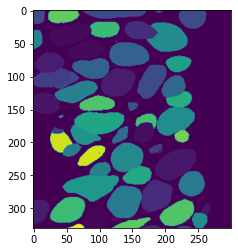

In [9]:
plt.imshow(masks[1][10])
plt.show()

In [13]:
df = pd.read_csv(labels[1], sep=';')
print(df.head())
print(len(df))

   Unnamed: 0  label class
0           0      6    BC
1           1     15    BC
2           2     23    BC
3           3     55    BC
4           4     56    AC
226


In [18]:
ids_mask = sorted(np.unique(masks[1]))[1:]
ids_labels = df['label']

for i in range(len(ids_mask)):
    if ids_mask[i] != ids_labels[i]:
        print(ids_mask[i], ids_labels[i])

2282 2277
2292 2282
2300 2292
2325 2300
2342 2325
2353 2342
2375 2353
2398 2375
2400 2398
2409 2400
2461 2409
2477 2461
2478 2477
2500 2478
2533 2499
2574 2500
2582 2533
2618 2574
2739 2582
2786 2618
2807 2739
2838 2786
2891 2807
2899 2838
2900 2891
2945 2899
2959 2900
3024 2945
3065 2959
3071 3024
3089 3065
3112 3071
3126 3089
3130 3112
3176 3126
3185 3130
3224 3176
3248 3185
3311 3224
3336 3248
3426 3311
3466 3336
3542 3426
3577 3466
3650 3542
3669 3577
3814 3650
3826 3669
3991 3814
4051 3826


In [ ]:
classes = {'RGC': 1, 'BC': 2, 'PR': 3, 'AC': 4, 'HC': 5, 'LENS': 6, 'RPE': 7, np.nan : 8}

converted_classes = df['class'].map(classes)
print(converted_classes)

In [ ]:
ids = {k:v for k,v in zip(df['label'], converted_classes)}
ids[0] = 0
print(ids)

In [ ]:
print(len(df), len(ids))

In [ ]:
mask = masks[0]
m = mask.flatten()
print(m)
new_mask = []
for i in range(len(m)):
    if m[i] not in ids:
        new_mask.append(8)
    else:
        new_mask.append(ids[m[i]])
    
print(new_mask)

In [ ]:
print(masks[0].shape)

new_mask = np.asarray(new_mask)
new_mask = np.reshape(new_mask, masks[0].shape)
print(new_mask.shape)

In [ ]:
plt.imshow(new_mask[10])
plt.show()

In [ ]:
import napari

viewer = napari.view_image(new_mask)


In [ ]:
viewer = napari.view_labels(new_mask, scale=(2, 1, 1))

In [ ]:
# sava data as json file
import json
with open(path_mask+'/labels/'+os.path.basename(labels[0])[:-3]+'json', 'w') as fp:
    json_ids = json.dump(ids, fp)
    

In [ ]:
!ls


In [ ]:
!cd masks


In [ ]:
path_mask

In [ ]:
!ls /Users/lucrezia/Desktop/StarDistData/ELISA/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/